In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 5.6 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_df = pd.read_csv('phong.csv')

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      100 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           100 non-null    object 
 6   timestamp                      100 non-null    int64  
 7   image                          91 non-null     object 
 8   image_lowquality               100 non-null    object 
 9   images                         100 non-null    object 
 10  images_description             100 non-null    object 
 11  images_lowquality              100 non-null    object 
 12  images_lowquality_description  100 non-null    obje

In [5]:
raw_df.describe()

,post_id,shared_text,original_text,timestamp,video_duration_seconds,video_height,video_id,video_quality,video_size_MB,video_watches,...,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,reaction_count,with,page_id,sharers,image_id
count,1.000000e+02,0.0,0.0,1.000000e+02,0.0,0.0,9.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,100.000000,0.0,1.000000e+02,0.0,8.700000e+01
mean,7.369777e+14,NaN,NaN,1.698829e+09,NaN,NaN,1.639287e+15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5271.290000,NaN,4.931203e+14,NaN,7.370641e+14
std,2.504815e+12,NaN,NaN,3.695662e+05,NaN,NaN,1.837127e+15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6916.620955,NaN,6.281486e-02,NaN,2.498247e+12
min,7.327334e+14,NaN,NaN,1.698217e+09,NaN,NaN,7.127689e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,264.000000,NaN,4.931203e+14,NaN,7.327333e+14
25%,7.347413e+14,NaN,NaN,1.698501e+09,NaN,NaN,7.412122e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1294.500000,NaN,4.931203e+14,NaN,7.349776e+14
50%,7.369173e+14,NaN,NaN,1.698819e+09,NaN,NaN,1.011443e+15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3511.500000,NaN,4.931203e+14,NaN,7.370089e+14
75%,7.392057e+14,NaN,NaN,1.699158e+09,NaN,NaN,1.383837e+15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5901.000000,NaN,4.931203e+14,NaN,7.392249e+14
max,7.410278e+14,NaN,NaN,1.699430e+09,NaN,NaN,6.470265e+15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,44044.000000,NaN,4.931203e+14,NaN,7.410262e+14


In [6]:
raw_df.dropna(axis= 'columns', how= 'all', inplace= True)
raw_df

,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,comments_full,reactors,w3_fb_url,reactions,reaction_count,page_id,image_id,image_ids,was_live,fetched_time
0,741027818068204,Đứa bạn tôi lần đầu đi zẩy,Đứa bạn tôi lần đầu đi zẩy,2023-11-08 15:00:38,1699430438,NaN,https://scontent.fsgn2-9.fna.fbcdn.net/v/t15.5...,[],[],['https://scontent.fsgn2-9.fna.fbcdn.net/v/t15...,...,"[{'comment_id': '1480705476107356', 'comment_u...",[],https://www.facebook.com/ocu.vn/posts/74102781...,"{'thích': 437, 'yêu thích': 2, 'haha': 724, 'w...",1186,493120297524255,NaN,[],False,2023-11-08 15:59:24.567924
1,741026291401690,Chưa có lời giải?,Chưa có lời giải?,2023-11-08 14:35:56,1699428956,https://scontent.fsgn2-9.fna.fbcdn.net/v/t39.3...,https://scontent.fsgn2-9.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-9.fna.fbcdn.net/v/t39...,"['Có thể là hình ảnh về 1 người, đang học và v...",['https://scontent.fsgn2-9.fna.fbcdn.net/v/t39...,...,"[{'comment_id': '2208288482896014', 'comment_u...","[{'name': 'Thanh Hà', 'link': 'https://faceboo...",https://www.facebook.com/ocu.vn/posts/74102629...,"{'thích': 216, 'haha': 55, 'buồn': 4}",275,493120297524255,7.410262e+14,['741026228068363'],False,2023-11-08 15:59:37.009802
2,740947834742869,Bạn biết họ là ai\n#HL,Bạn biết họ là ai\n#HL,2023-11-08 13:00:03,1699423203,https://scontent.fsgn2-9.fna.fbcdn.net/v/t39.3...,https://scontent.fsgn2-9.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-9.fna.fbcdn.net/v/t39...,"[""Có thể là hình ảnh về 3 người và văn bản cho...",['https://scontent.fsgn2-9.fna.fbcdn.net/v/t39...,...,"[{'comment_id': '1538001623613683', 'comment_u...","[{'name': 'David Đào', 'link': 'https://facebo...",https://www.facebook.com/ocu.vn/posts/74094783...,"{'thích': 329, 'yêu thích': 2, 'haha': 199, 'w...",535,493120297524255,7.409477e+14,['740947658076220'],False,2023-11-08 15:59:44.279613
3,740951838075802,Sơ suất quá\n\n_kid_,Sơ suất quá\n\n_kid_,2023-11-08 11:10:21,1699416621,https://scontent.fsgn2-6.fna.fbcdn.net/v/t39.3...,https://scontent.fsgn2-6.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-6.fna.fbcdn.net/v/t39...,"[""Có thể là hình ảnh về 3 người và văn bản cho...",['https://scontent.fsgn2-6.fna.fbcdn.net/v/t39...,...,"[{'comment_id': '889945169401937', 'comment_ur...","[{'name': 'Đăng Khánh', 'link': 'https://faceb...",https://www.facebook.com/ocu.vn/posts/74095183...,"{'thích': 275, 'yêu thích': 2, 'haha': 64, 'wo...",344,493120297524255,7.409516e+14,['740951611409158'],False,2023-11-08 15:59:57.256621
4,740914301412889,Xài cả băng dính cho chắc\n\n#kid,Xài cả băng dính cho chắc\n\n#kid,2023-11-08 09:29:51,1699410591,https://scontent.fsgn2-9.fna.fbcdn.net/v/t39.3...,https://scontent.fsgn2-9.fna.fbcdn.net/v/t39.3...,['https://scontent.fsgn2-9.fna.fbcdn.net/v/t39...,['Có thể là hình ảnh về 2 người và văn bản cho...,['https://scontent.fsgn2-9.fna.fbcdn.net/v/t39...,...,"[{'comment_id': '1262500834436276', 'comment_u...","[{'name': 'Dinh Binhh', 'link': 'https://faceb...",https://www.facebook.com/ocu.vn/posts/74091430...,"{'thích': 295, 'yêu thích': 2, 'haha': 100, 'b...",402,493120297524255,7.409142e+14,['740914231412896'],False,2023-11-08 16:00:14.260505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,732733425564310,Ủa là sao =)))),Ủa là sao =)))),2023-10-25 19:00:05,1698235205,https://scontent.fsgn2-10.fna.fbcdn.net/v/t39....,https://scontent.fsgn2-10.fna.fbcdn.net/v/t39....,['https://scontent.fsgn2-10.fna.fbcdn.net/v/t3...,"[""Có thể là hình ảnh về văn bản cho biết 'Điều...",['https://scontent.fsgn2-10.fna.fbcdn.net/v/t3...,...,"[{'comment_id': '292427727015543', 'comment_ur...",[],https://www.facebook.com/ocu.vn/posts/73273342...,"{'thích': 2146, 'yêu thích': 11, 'haha': 1277,...",3484,493120297524255,7.327333e+14,['732733275564325'],False,2023-11-08 16:26:01.792274
96,732884678882518,Tan vỡ\n\n#kid,Tan vỡ\n\n#kid,2023-10-25 17:50:18,1698231018,https://scontent.fsgn2-5.fna.

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      100 non-null    object 
 3   time                           100 non-null    object 
 4   timestamp                      100 non-null    int64  
 5   image                          91 non-null     object 
 6   image_lowquality               100 non-null    object 
 7   images                         100 non-null    object 
 8   images_description             100 non-null    object 
 9   images_lowquality              100 non-null    object 
 10  images_lowquality_description  100 non-null    object 
 11  video                          9 non-null      object 
 12  video_id                       9 non-null      floa

In [45]:
first_row = raw_df.iloc[0]
first_row

post_id                                                            741027818068204
text                                                    Đứa bạn tôi lần đầu đi zẩy
post_text                                               Đứa bạn tôi lần đầu đi zẩy
time                                                           2023-11-08 15:00:38
timestamp                                                               1699430438
image                                                                          NaN
image_lowquality                 https://scontent.fsgn2-9.fna.fbcdn.net/v/t15.5...
images                                                                          []
images_description                                                              []
images_lowquality                ['https://scontent.fsgn2-9.fna.fbcdn.net/v/t15...
images_lowquality_description                                               [None]
video                            https://scontent.fsgn2-6.fna.fbcdn.net/v/t42.1...
vide

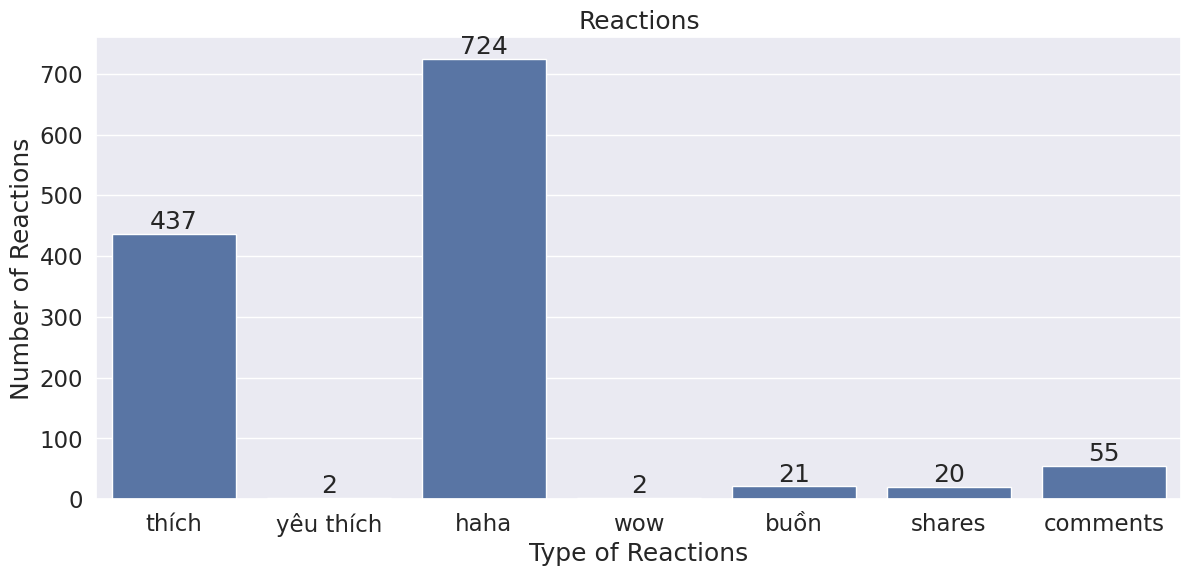

In [42]:
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
plt.figure(figsize=(14,6))
ax = sns.barplot(
    x=list(reactions.keys()), 
    y=list(reactions.values())
)
plt.bar_label(ax.containers[0])
plt.title('Reactions')
plt.xlabel('Type of Reactions')
plt.ylabel('Number of Reactions')
plt.show()

In [35]:
Max_reactions_count = raw_df[raw_df['reaction_count'] == raw_df['reaction_count'].max()]
Max_reactions_count

,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,comments_full,reactors,w3_fb_url,reactions,reaction_count,page_id,image_id,image_ids,was_live,fetched_time
46,737129398458046,Anh thua rồi tim em lắm lối,Anh thua rồi tim em lắm lối,2023-11-01 21:18:33,1698848313,NaN,https://scontent.fsgn2-6.fna.fbcdn.net/v/t15.5...,[],[],['https://scontent.fsgn2-6.fna.fbcdn.net/v/t15...,...,"[{'comment_id': '1059777585242732', 'comment_u...","[{'name': 'D Thai Sonn', 'link': 'https://face...",https://www.facebook.com/ocu.vn/posts/73712939...,"{'thích': 16174, 'yêu thích': 458, 'haha': 201...",44044,493120297524255,NaN,[],False,2023-11-08 16:10:49.658912


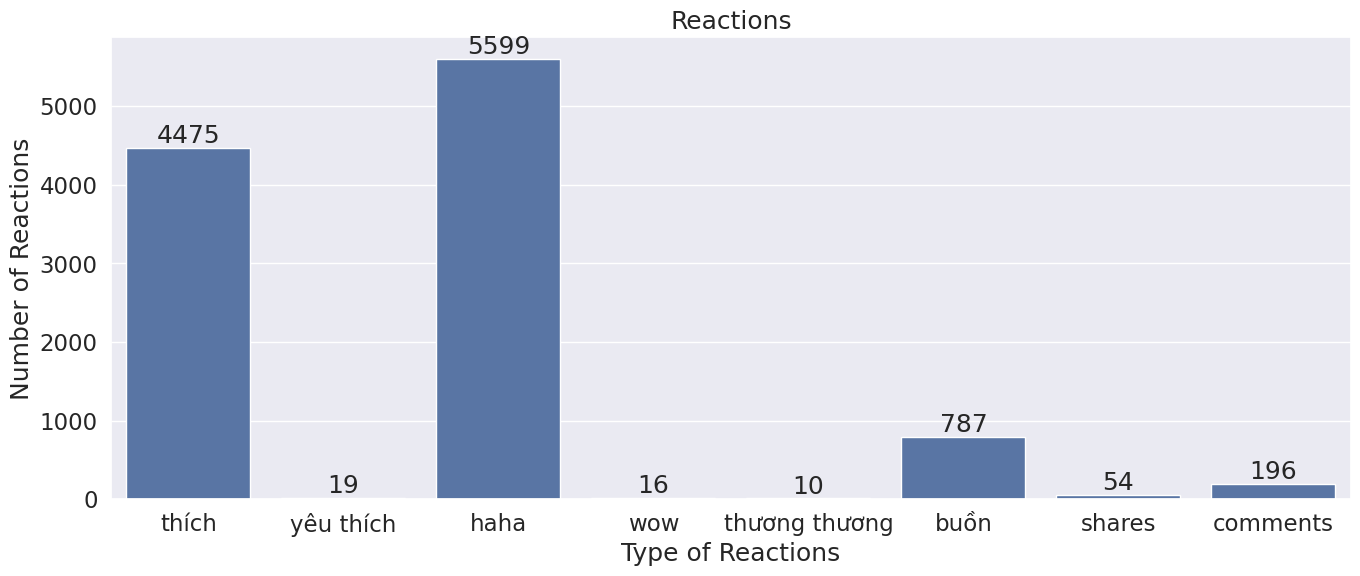

In [40]:
MRCplot = raw_df.iloc[36]
reactions = dict(eval(MRCplot['reactions']))
reactions["shares"] = MRCplot['shares']
reactions["comments"] = MRCplot['comments']
plt.figure(figsize=(16,6))
ax = sns.barplot(
    x=list(reactions.keys()), 
    y=list(reactions.values())
)
plt.bar_label(ax.containers[0])
plt.title('Reactions')
plt.xlabel('Type of Reactions')
plt.ylabel('Number of Reactions')
plt.show()

In [15]:
df_text = raw_df[['post_id','post_text']]
text    = str(df_text['post_text'])
df_text

,post_id,post_text
0,741027818068204,Đứa bạn tôi lần đầu đi zẩy
1,741026291401690,Chưa có lời giải?
2,740947834742869,Bạn biết họ là ai\n#HL
3,740951838075802,Sơ suất quá\n\n_kid_
4,740914301412889,Xài cả băng dính cho chắc\n\n#kid
...,...,...
95,732733425564310,Ủa là sao =))))
96,732884678882518,Tan vỡ\n\n#kid
97,732863278884658,Đẳng cấp
98,732796052224714,Gửi lính gác cho ta\n#HL


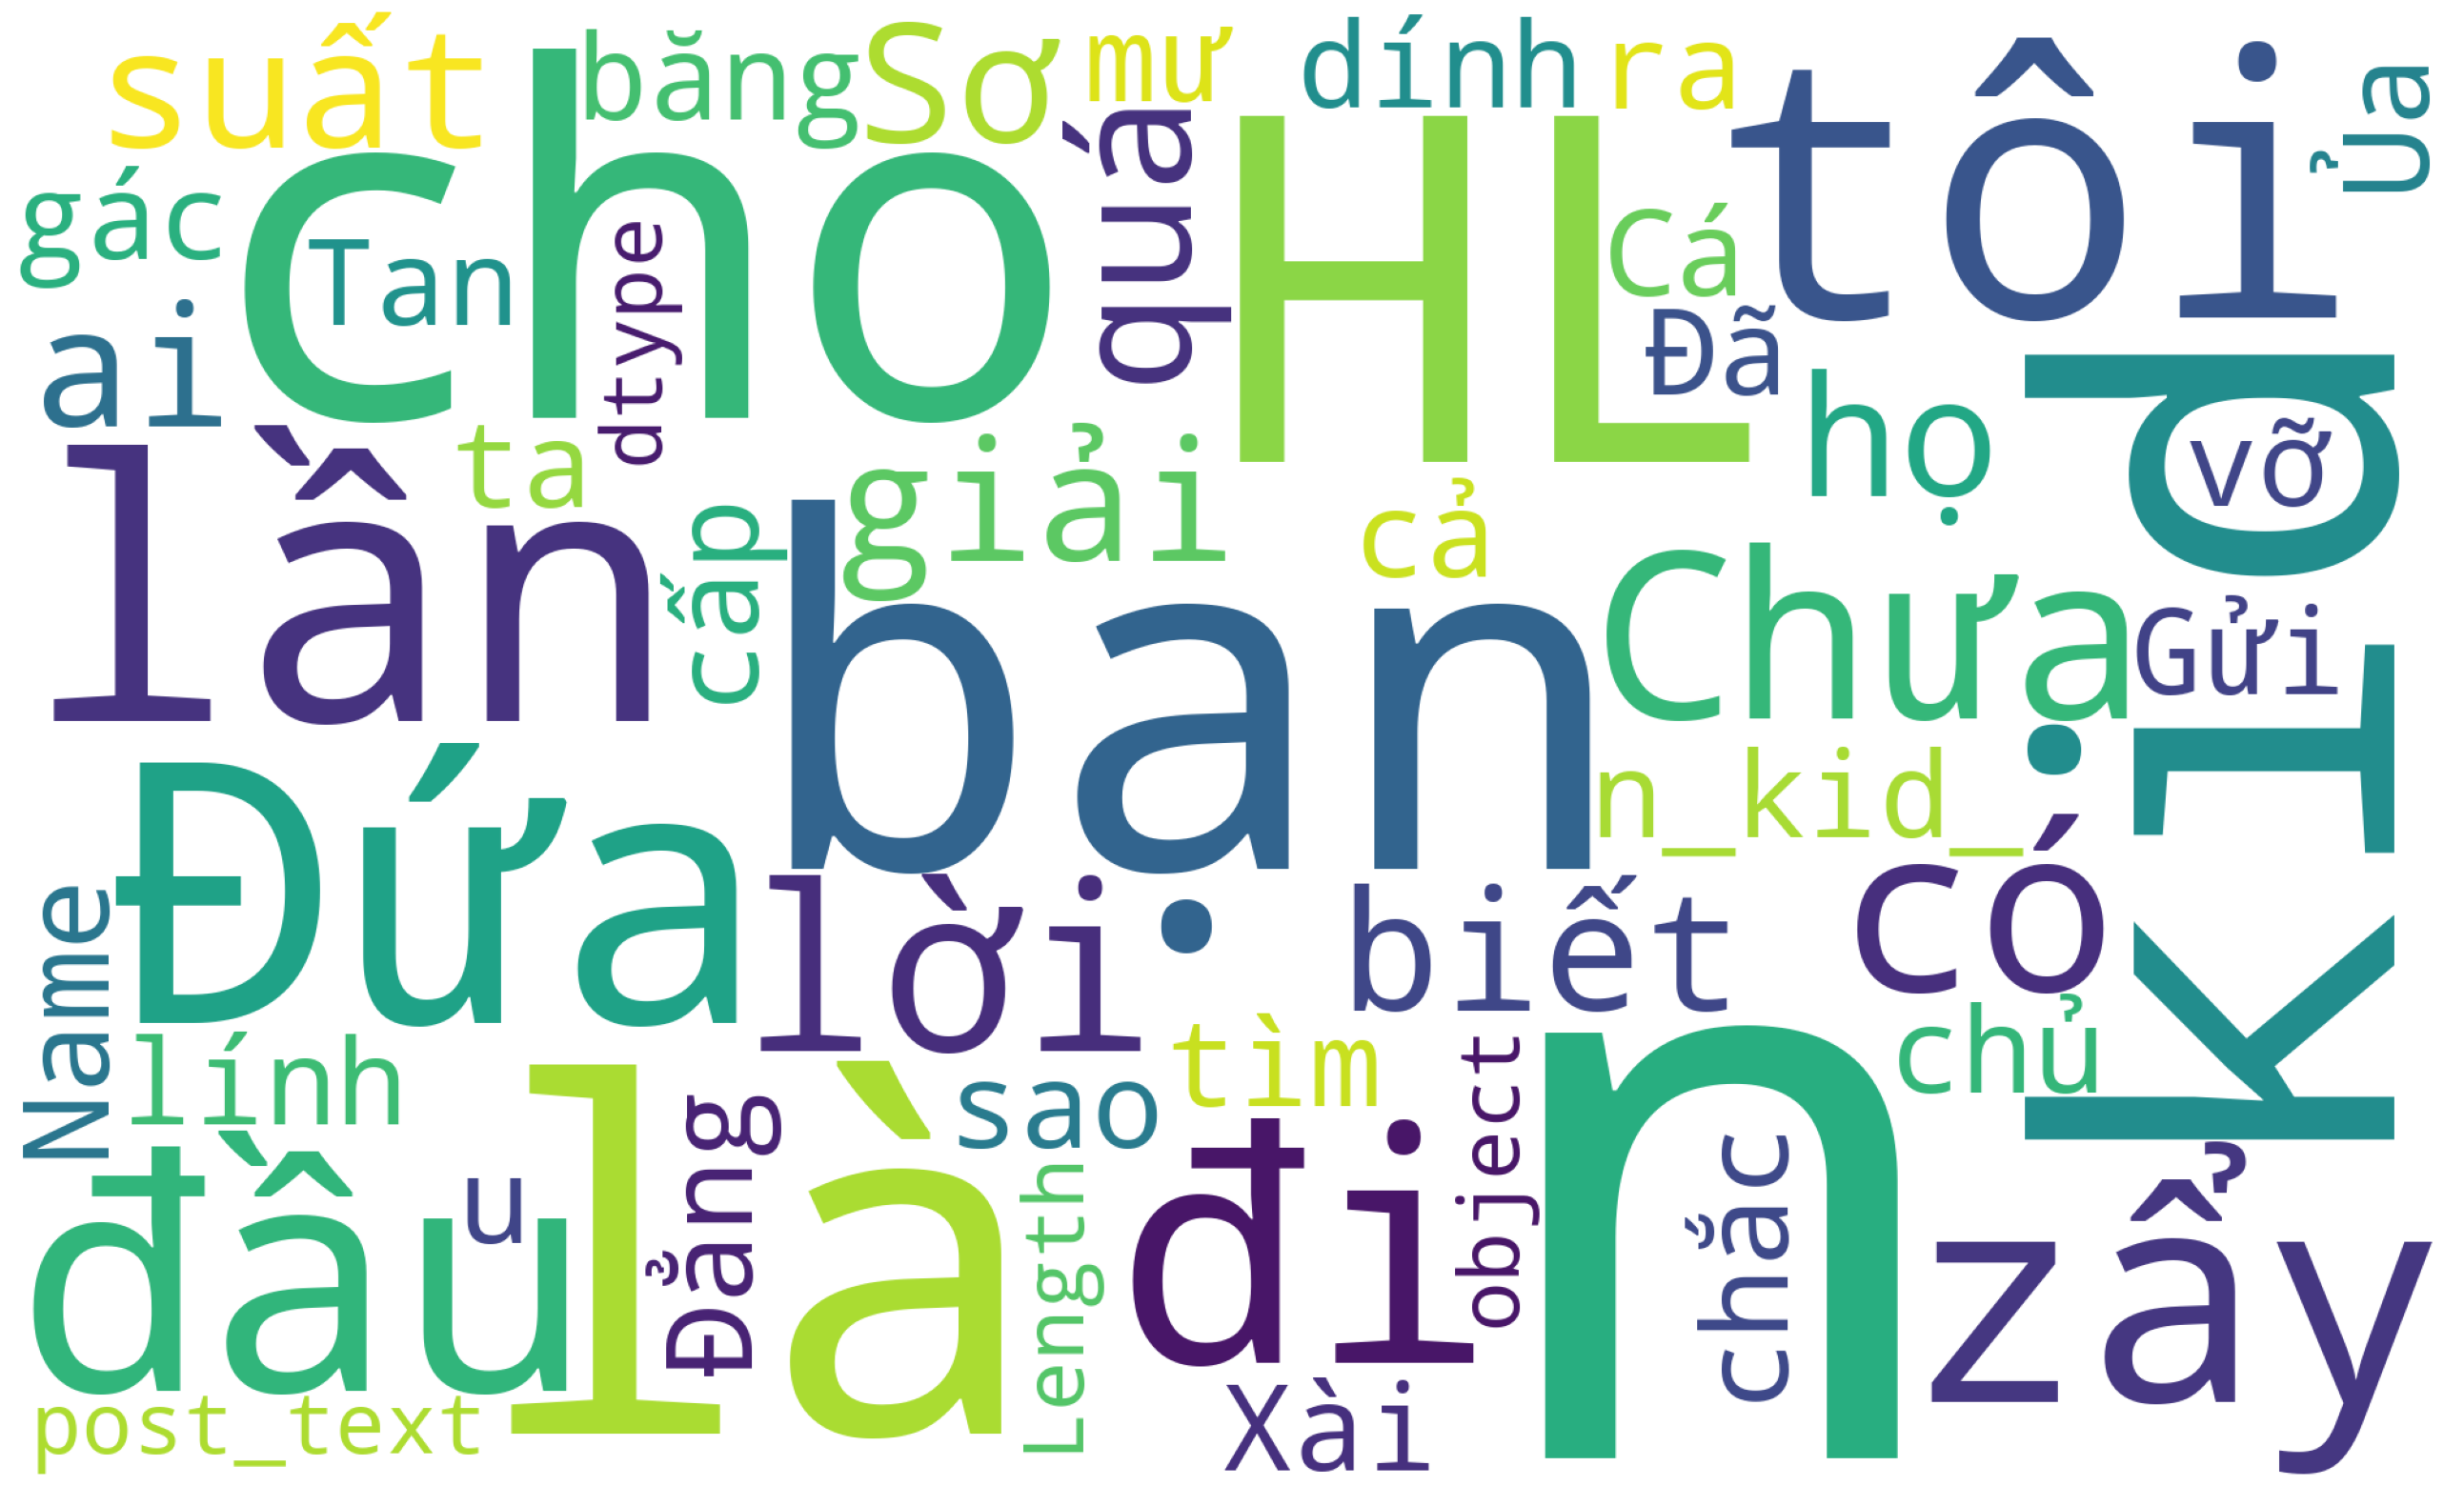

In [24]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=200,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

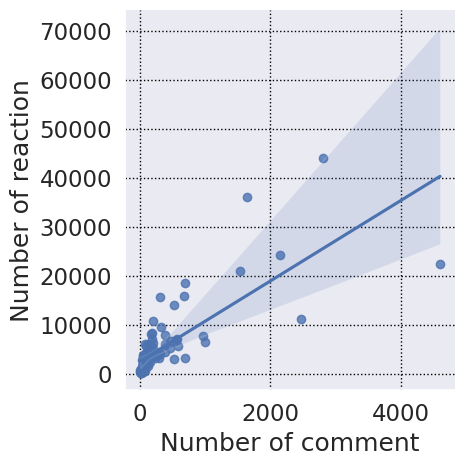

In [33]:
sns.lmplot(
    data = raw_df, 
    y = 'reaction_count',
    x = 'comments'
)
plt.ylabel('Number of reaction')
plt.xlabel('Number of comment')
plt.grid(True, ls = ':', color = 'black')
plt.show()

In [34]:
from scipy.stats import pearsonr

corr , _ = pearsonr(raw_df['reaction_count'], raw_df['comments'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.767
